In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from tkinter import *
from tkinter import filedialog
import cv2

In [60]:
label_names = ['groom', 'left', 'pause', 'rear', 'right', 'straight']

In [44]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
files_baseline = filedialog.askopenfilename(multiple=True, title='load baseline labels csv')

%gui tk

2023-02-19 15:27:38.375 python[60145:3115874] +[CATransaction synchronize] called within transaction


In [59]:
baseline_df

,time,groom,left,pause,rear,right,straight
0,0.0,0,0,1,0,0,0
1,0.1,0,1,0,0,0,0
2,0.2,0,0,1,0,0,0
3,0.3,0,0,1,0,0,0
4,0.4,0,1,0,0,0,0
...,...,...,...,...,...,...,...
21411,2141.1,0,0,1,0,0,0
21412,2141.2,0,0,1,0,0,0
21413,2141.3,0,0,1,0,0,0
21414,2141.4,0,0,1,0,0,0


In [45]:
baseline_df = pd.read_csv(files_baseline[0], low_memory=False)
labels = np.argmax(np.array(baseline_df.iloc[:, 1:]), axis=1)
labels

array([2, 1, 2, ..., 2, 2, 4])

In [46]:
labels[:50]

array([2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 5, 5, 5, 5, 5, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2])

In [47]:
# bout_start_id = labels[[0, np.where(np.diff(labels) != 0)[0]]]
bout_start_idx = np.where(np.diff(np.hstack([-1, labels])) != 0)[0]
bout_durations = np.diff(bout_start_idx)
bout_start_label = labels[bout_start_idx]
bout_start_idx[:20], bout_durations[:20], bout_start_label[:50]

(array([ 0,  1,  2,  4,  9, 12, 14, 19, 20, 27, 28, 29, 48, 49, 56, 61, 72,
        74, 76, 80]),
 array([ 1,  1,  2,  5,  3,  2,  5,  1,  7,  1,  1, 19,  1,  7,  5, 11,  2,
         2,  4,  1]),
 array([2, 1, 2, 1, 2, 1, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 3, 2, 3, 4,
        5, 2, 5, 2, 5, 2, 4, 2, 4, 0, 4, 2, 5, 4, 2, 1, 2, 1, 2, 5, 3, 2,
        5, 2, 5, 2, 4, 2]))

In [54]:
idx_long = np.where(bout_durations >= 30)[0]
bout_start_label[idx_long], idx_long, bout_start_idx[idx_long]

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([  29,   96,  111,  129,  133,  168,  218,  220,  226,  228,  230,
         232,  234,  236,  238,  240,  244,  246,  253,  267,  284,  292,
         294,  320,  322,  334,  342,  344,  346,  381,  388,  403,  631,
         666,  667,  681,  692,  693,  702,  745,  747,  772,  786,  789,
         801,  824,  866,  872,  921,  928,  940,  968,  982,  984, 1002,
        1042, 1058, 1090, 1144, 1174, 1180, 1182, 1191, 1232, 1259, 1268,
        1314, 1316, 1329, 1362, 1384, 1411, 1413, 1419, 1447

In [58]:
bout_start_idx[idx_long[14]], bout_durations[idx_long[14]], bout_start_label[idx_long[14]]

(2326, 56, 2)

In [56]:
vid_file = '/Users/alexanderhsu/Google Drive/My Drive/2023Data/seal/baseline/24285_zh_4.15-04152022120056-0000DLC_resnet50_Open Field Pilot 4.15.22Apr26shuffle1_1030000_labeled.mp4'
frames = []
for frame_num in np.arange(2326, 2326+56):
    # print(frame_num)
# frame_no = 424
    cap = cv2.VideoCapture(vid_file)  # video_name is the video being called
    cap.set(1,frame_num)  # Where frame_no is the frame you want
    ret, frame = cap.read()  # Read the frame
    frames.append(frame)
    # plt.imshow(frame)

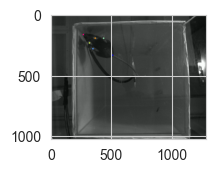

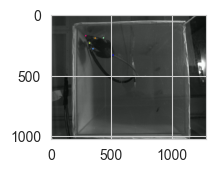

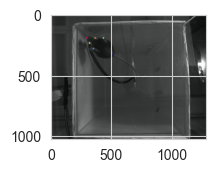

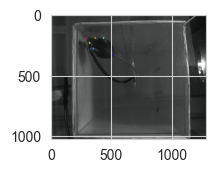

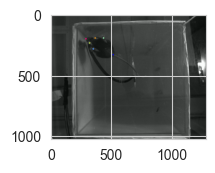

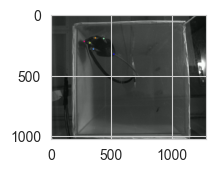

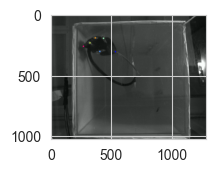

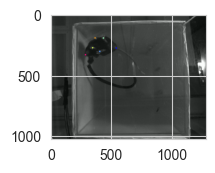

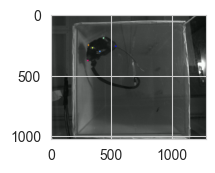

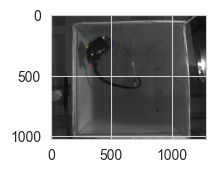

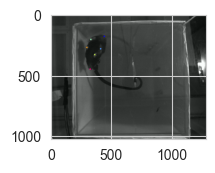

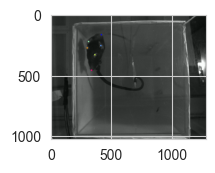

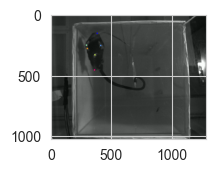

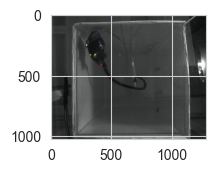

In [57]:
for frame in frames[::4]:
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(frame)